## Face Detection,Face Verification,Face Recognition,Facial Analysis,Real Time Analysis

Deepface is a Popular Open Source Facial Recognition Library

DeepFace is the most lightweight face recognition and facial attribute analysis library for Python. 

The open-sourced DeepFace library includes all leading-edge AI models for face recognition

It automatically handles all procedures for facial recognition in the background.

We can run DeepFace with just a few lines of code and we don’t need to acquire in-depth knowledge about all the processes behind it

In [1]:
#Install the library using
#!pip install deepface 

In [2]:
#Importing opencv package for python
import cv2
#Importing os module to deal with operating system
import os
#Importing module for dealing with dataframe
import pandas as pd
#Importing  library used for working with arrays
import numpy as np
#Importing library used to create 2D graphs and plots
import matplotlib.pyplot as plt

from deepface import DeepFace

In [3]:
#Defining path of the database where images are kept
db_path = "D:\Workshop_Material\Images"

In [4]:
#Changing the directory
os.chdir(db_path)

In [5]:
pwd

'D:\\Workshop_Material\\Images'

## 1) Plotting an Image

In [6]:
def image_show(image_path):
    #reads the image from the file specified by filename
    img=cv2.imread(image_path)
    #converting into RGB as open cv give as BGR format
    plt.imshow(img[:,:,::-1])
    plt.show()

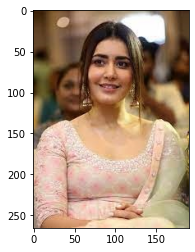

In [7]:
image_show("img14.jpg")

## 2)Face Detection

As the name suggest here we will be detecting face given an image

In [8]:
def Face_Detection(image_path):
    #Reading image
    img=cv2.imread(image_path)
    # Displaying an image 
    plt.imshow(img[:,:,::-1])
    plt.show()
    
    #Detecting face using detectFace method available in DeepFace
    #We can choose different detector_backend available in the library like 'opencv', 'ssd', 'dlib', 'mtcnn','mediapipe'
    
    Detected_face=DeepFace.detectFace(img_path = image_path, target_size = (224, 224), detector_backend = 'retinaface')
    
    print("The detected face for the given image")
    plt.imshow(Detected_face)
    plt.show()
    
   

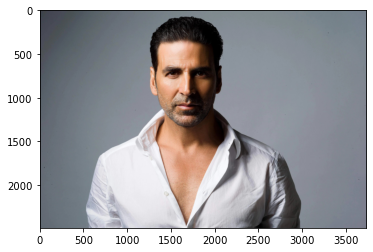

The detected face for the given image


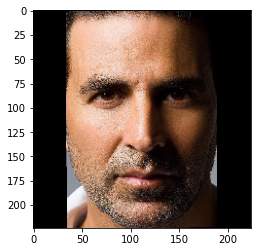

In [9]:
Face_Detection("img2.jpg")

## 3)Face Verification

Here the task is to verify/compare a face with another and to check whether it match or not

This can be used to confirm that a physical face matches the one in an ID document

In [10]:
def Face_Verification(image1_path,image2_path):
    #Reading two images which need to compare
    img1=cv2.imread(image1_path)
    img2=cv2.imread(image2_path)
    
    #Displaying the two images
    plt.imshow(img1[:,:,::-1])
    plt.show()
    plt.imshow(img2[:,:,::-1])
    plt.show()
    
    #Verification 
    verification_result=DeepFace.verify(image1_path,image2_path)
    print("Verification Result of two images",verification_result)
    
    output=verification_result['verified']
    if output:
        print('The two images are same')
        
    else:
        print('The two images are not same')
    
    

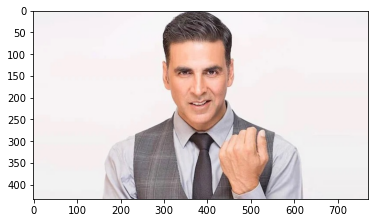

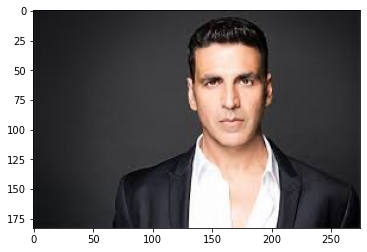

1/1 [==============================] - 0s 190ms/step
Verification Result of two images {'verified': True, 'distance': 0.17907208843262112, 'threshold': 0.4, 'model': 'VGG-Face', 'detector_backend': 'opencv', 'similarity_metric': 'cosine'}
The two images are same


In [11]:
Face_Verification("img1.jpg","img3.jpg")

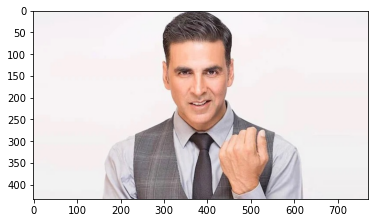

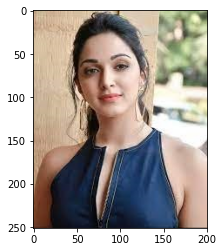

1/1 [==============================] - 0s 185ms/step
Verification Result of two images {'verified': False, 'distance': 0.8855784444079244, 'threshold': 0.4, 'model': 'VGG-Face', 'detector_backend': 'opencv', 'similarity_metric': 'cosine'}
The two images are not same


In [12]:
Face_Verification("img1.jpg","img13.jpg")

## 4) Face Recognition

In this task we give an image and try to find the match faces using an image database.

Performing face recognition requires running face verification many times

use find method for recognition

In [13]:
df = DeepFace.find(img_path = "img1.jpg", db_path = db_path,enforce_detection= False)

There are  35  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 204ms/step
find function lasts  0.42731189727783203  seconds


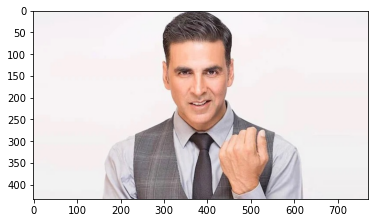

In [14]:
image_show("img1.jpg")

In [15]:
df

,identity,VGG-Face_cosine
0,D:\OneDrive - Indian School of Business\Worksh...,0.000000
1,D:\OneDrive - Indian School of Business\Worksh...,0.179072
2,D:\OneDrive - Indian School of Business\Worksh...,0.179072
3,D:\OneDrive - Indian School of Business\Worksh...,0.237507
4,D:\OneDrive - Indian School of Business\Worksh...,0.239458
5,D:\OneDrive - Indian School of Business\Worksh...,0.357899
6,D:\OneDrive - Indian School of Business\Worksh...,0.391453


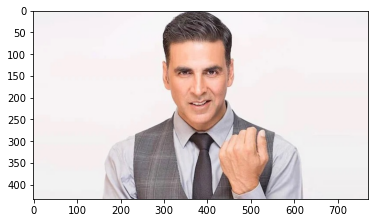

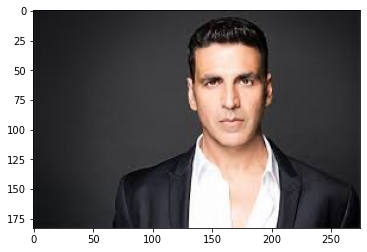

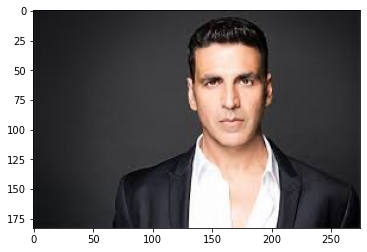

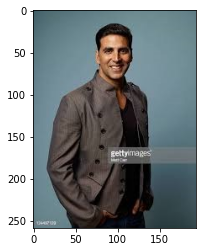

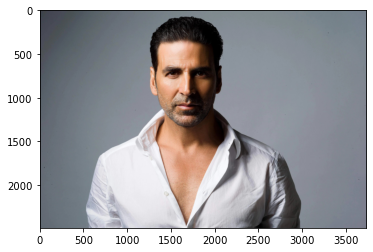

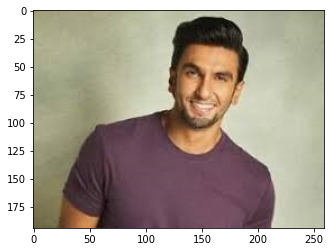

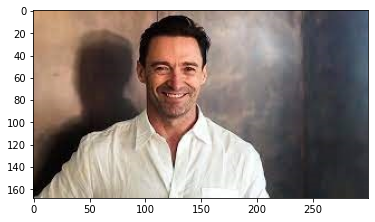

In [16]:
#List of images which matches with the target image in the database
for i in range(len(df['identity'])):
    image_show(df['identity'][i])

By default Deepface use VGG-Face as model and backend detector as opencv,we can use different models

### Options of using different models

In [17]:
models = ["VGG-Face", "Facenet", "Facenet512", "OpenFace", "DeepFace", "DeepID", "ArcFace", "Dlib", "SFace"]

#face verification
result = DeepFace.verify(img1_path = "img1.jpg", img2_path = "img2.jpg", model_name = models[1])

#face recognition
df_1 = DeepFace.find(img_path = "img1.jpg", db_path = db_path, model_name = models[1],enforce_detection= False)

# We can get face embeddings using represent
embedding = DeepFace.represent(img_path = "img1.jpg", model_name = models[1])

1/1 [==============================] - 0s 76ms/step
There are  35  representations found in  representations_facenet.pkl
1/1 [==============================] - 0s 98ms/step
find function lasts  0.27913665771484375  seconds
1/1 [==============================] - 0s 68ms/step


In [18]:
df_1

,identity,Facenet_cosine
0,D:\OneDrive - Indian School of Business\Worksh...,2.220446e-16
1,D:\OneDrive - Indian School of Business\Worksh...,2.401378e-01
2,D:\OneDrive - Indian School of Business\Worksh...,3.019465e-01
3,D:\OneDrive - Indian School of Business\Worksh...,3.991478e-01
4,D:\OneDrive - Indian School of Business\Worksh...,3.991478e-01


From above we can see that given the same image if we use different model it displayed less number of identical image from the database

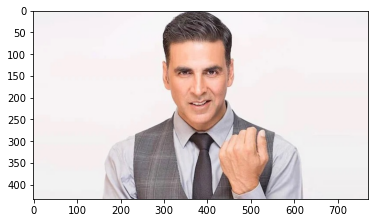

In [19]:
image_show("img1.jpg")

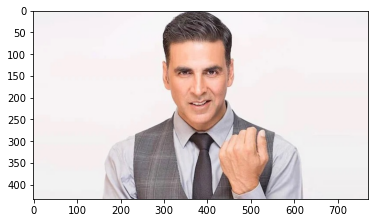

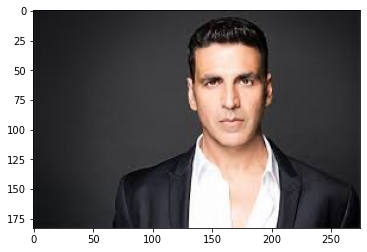

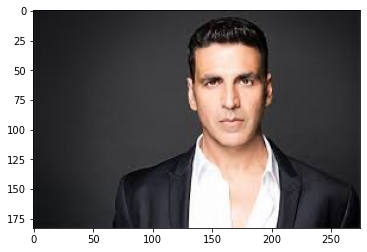

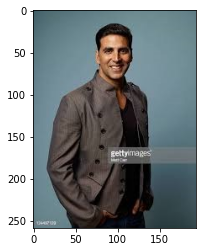

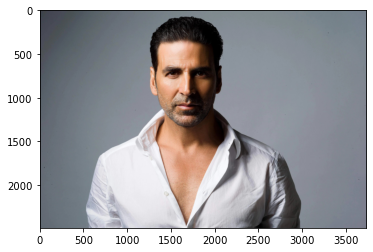

In [20]:
#List of images which matches with the target image in the database
for i in range(len(df_1['identity'])):
    image_show(df['identity'][i])

## 5) Facial Attribute Analysis 

Here the task is to do facial attributes analysis and is used to extract attributes such as age, gender classification, emotion analysis, or race/ethnicity prediction.

We need to use analyze method

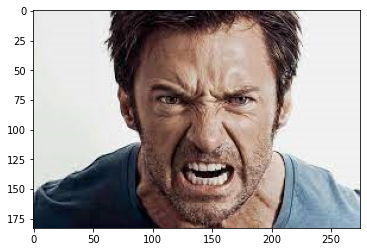

In [21]:
#Selecting an image showing
image_show("exp_1.jpg")

In [22]:
obj = DeepFace.analyze(img_path = "exp_1.jpg", actions = ['age', 'gender', 'race', 'emotion'])

Action: age:   0%|                                                                               | 0/4 [00:00<?, ?it/s]

1/1 [==============================] - 0s 342ms/step


Action: gender:  25%|█████████████████                                                   | 1/4 [00:00<00:01,  2.52it/s]

1/1 [==============================] - 0s 388ms/step


Action: race:  50%|███████████████████████████████████                                   | 2/4 [00:00<00:00,  2.43it/s]

1/1 [==============================] - 0s 378ms/step


Action: emotion:  75%|██████████████████████████████████████████████████▎                | 3/4 [00:01<00:00,  2.44it/s]

1/1 [==============================] - 0s 108ms/step


Action: emotion: 100%|███████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.83it/s]


In [23]:
obj

{'age': 42,
 'region': {'x': 78, 'y': 23, 'w': 139, 'h': 139},
 'gender': 'Man',
 'race': {'asian': 1.361881010234356,
  'indian': 3.880215063691139,
  'black': 0.4604801069945097,
  'white': 45.874086022377014,
  'middle eastern': 25.863376259803772,
  'latino hispanic': 22.559961676597595},
 'dominant_race': 'white',
 'emotion': {'angry': 84.0148200997603,
  'disgust': 4.585399427022582e-05,
  'fear': 15.985093473499624,
  'happy': 5.127590064669003e-10,
  'sad': 4.209757629169577e-05,
  'surprise': 1.0407769017465145e-08,
  'neutral': 5.082568002987888e-09},
 'dominant_emotion': 'angry'}

### We can also use different backend for detecting

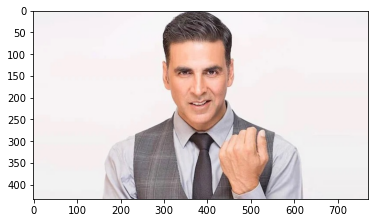

In [24]:
image_show("img1.jpg")

In [25]:
backends = ['opencv', 'ssd', 'dlib', 'mtcnn', 'retinaface', 'mediapipe']

#face verification
obj = DeepFace.verify(img1_path = "img1.jpg", img2_path = "img2.jpg", detector_backend = backends[4])

#face recognition
df = DeepFace.find(img_path = "img1.jpg", db_path = db_path, detector_backend = backends[4],enforce_detection= False)

#embeddings
embedding = DeepFace.represent(img_path = "img1.jpg", detector_backend = backends[4])

#facial analysis
demography = DeepFace.analyze(img_path = "img1.jpg", detector_backend = backends[4])

#face detection and alignment
face = DeepFace.detectFace(img_path = "img1.jpg", target_size = (224, 224), detector_backend = backends[4])

1/1 [==============================] - 0s 191ms/step
There are  35  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 195ms/step
find function lasts  2.9790570735931396  seconds
1/1 [==============================] - 0s 216ms/step


Action: emotion:   0%|                                                                           | 0/4 [00:00<?, ?it/s]

1/1 [==============================] - 0s 20ms/step


Action: age:  25%|█████████████████▊                                                     | 1/4 [00:02<00:08,  2.85s/it]

1/1 [==============================] - 0s 204ms/step


Action: gender:  50%|██████████████████████████████████                                  | 2/4 [00:05<00:05,  2.96s/it]

1/1 [==============================] - 0s 225ms/step


Action: race:  75%|████████████████████████████████████████████████████▌                 | 3/4 [00:06<00:01,  1.73s/it]

1/1 [==============================] - 0s 196ms/step


Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:06<00:00,  1.59s/it]


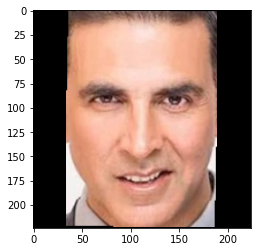

In [26]:
plt.imshow(face)

## 6) Real Time Analysis

This feature includes testing face recognition and facial attribute analysis with the real-time video feed of your webcam

In [27]:
#Stream function access your webcam and apply both face recognition and facial attribute analysis.
DeepFace.stream(db_path = db_path,model_name='VGG-Face')
#DeepFace.stream(db_path = db_path,model_name="VGG-Face",detector_backend = 'retinaface')
#Press q to stop streaming
#you can select different model,by default it is VGG-Face

Detector backend is  opencv
VGG-Face  is built
Emotion model loaded
Age model loaded
Gender model loaded
Facial attibute analysis models loaded in  0.002498149871826172  seconds


Finding embedding for exp_1.jpg:   0%|                                                          | 0/37 [00:00<?, ?it/s]

1/1 [==============================] - 0s 200ms/step


Finding embedding for exp_2.jpg:   3%|█▎                                                | 1/37 [00:00<00:09,  3.91it/s]

1/1 [==============================] - 0s 243ms/step


Finding embedding for exp_3.jpg:   5%|██▋                                               | 2/37 [00:00<00:09,  3.55it/s]

1/1 [==============================] - 0s 198ms/step


Finding embedding for exp_4.jpg:   8%|████                                              | 3/37 [00:00<00:09,  3.58it/s]

1/1 [==============================] - 0s 205ms/step


Finding embedding for img1.jpg:  11%|█████▌                                             | 4/37 [00:01<00:09,  3.57it/s]

1/1 [==============================] - 0s 221ms/step


Finding embedding for img10.jpg:  14%|██████▊                                           | 5/37 [00:01<00:09,  3.28it/s]

1/1 [==============================] - 0s 229ms/step


Finding embedding for img11.jpg:  16%|████████                                          | 6/37 [00:01<00:09,  3.29it/s]

1/1 [==============================] - 0s 216ms/step


Finding embedding for img12.jpg:  19%|█████████▍                                        | 7/37 [00:02<00:08,  3.36it/s]

1/1 [==============================] - 0s 217ms/step


Finding embedding for img13.jpg:  22%|██████████▊                                       | 8/37 [00:02<00:08,  3.40it/s]

1/1 [==============================] - 0s 206ms/step


Finding embedding for img14.jpg:  24%|████████████▏                                     | 9/37 [00:02<00:08,  3.41it/s]

1/1 [==============================] - 0s 196ms/step


Finding embedding for img15.jpg:  27%|█████████████▏                                   | 10/37 [00:02<00:07,  3.53it/s]

1/1 [==============================] - 0s 250ms/step


Finding embedding for img16.jpg:  30%|██████████████▌                                  | 11/37 [00:03<00:07,  3.36it/s]

1/1 [==============================] - 0s 213ms/step


Finding embedding for img17.jpg:  32%|███████████████▉                                 | 12/37 [00:03<00:07,  3.45it/s]

1/1 [==============================] - 0s 233ms/step


Finding embedding for img18.jpg:  35%|█████████████████▏                               | 13/37 [00:03<00:06,  3.45it/s]

1/1 [==============================] - 0s 224ms/step


Finding embedding for img19.jpg:  38%|██████████████████▌                              | 14/37 [00:04<00:06,  3.52it/s]

1/1 [==============================] - 0s 231ms/step


Finding embedding for img2.jpg:  41%|████████████████████▎                             | 15/37 [00:04<00:06,  3.43it/s]

1/1 [==============================] - 0s 214ms/step


Finding embedding for img20.jpg:  43%|█████████████████████▏                           | 16/37 [00:05<00:12,  1.68it/s]

1/1 [==============================] - 0s 219ms/step


Finding embedding for img21.jpg:  46%|██████████████████████▌                          | 17/37 [00:05<00:09,  2.01it/s]

1/1 [==============================] - 0s 255ms/step


Finding embedding for img22.jpg:  49%|███████████████████████▊                         | 18/37 [00:06<00:08,  2.23it/s]

1/1 [==============================] - 0s 232ms/step


Finding embedding for img23.jpg:  51%|█████████████████████████▏                       | 19/37 [00:06<00:07,  2.45it/s]

1/1 [==============================] - 0s 254ms/step


Finding embedding for img24.jpg:  54%|██████████████████████████▍                      | 20/37 [00:06<00:06,  2.57it/s]

1/1 [==============================] - 0s 235ms/step


Finding embedding for img25.jpg:  57%|███████████████████████████▊                     | 21/37 [00:07<00:05,  2.73it/s]

1/1 [==============================] - 0s 238ms/step


Finding embedding for img26.jpg:  59%|█████████████████████████████▏                   | 22/37 [00:07<00:05,  2.89it/s]

1/1 [==============================] - 0s 248ms/step


Finding embedding for img27.jpg:  62%|██████████████████████████████▍                  | 23/37 [00:07<00:04,  2.96it/s]

1/1 [==============================] - 0s 247ms/step


Finding embedding for img3.jpg:  65%|████████████████████████████████▍                 | 24/37 [00:08<00:04,  3.00it/s]

1/1 [==============================] - 0s 242ms/step


Finding embedding for img4.jpg:  68%|█████████████████████████████████▊                | 25/37 [00:08<00:03,  3.06it/s]

1/1 [==============================] - 0s 264ms/step


Finding embedding for img5.jpg:  70%|███████████████████████████████████▏              | 26/37 [00:08<00:03,  3.04it/s]

1/1 [==============================] - 0s 218ms/step


Finding embedding for img6.jpg:  73%|████████████████████████████████████▍             | 27/37 [00:09<00:03,  3.20it/s]

1/1 [==============================] - 0s 239ms/step


Finding embedding for img7.jpg:  76%|█████████████████████████████████████▊            | 28/37 [00:09<00:02,  3.26it/s]

1/1 [==============================] - 0s 251ms/step


Finding embedding for img8.jpg:  78%|███████████████████████████████████████▏          | 29/37 [00:09<00:02,  3.23it/s]

1/1 [==============================] - 0s 235ms/step


Finding embedding for img9.jpg:  81%|████████████████████████████████████████▌         | 30/37 [00:09<00:02,  3.30it/s]

1/1 [==============================] - 0s 224ms/step


Finding embedding for Pavan.jpg:  84%|█████████████████████████████████████████        | 31/37 [00:10<00:01,  3.35it/s]

1/1 [==============================] - 0s 207ms/step


Finding embedding for Sai.jpg:  86%|████████████████████████████████████████████       | 32/37 [00:10<00:01,  3.41it/s]

1/1 [==============================] - 0s 223ms/step


Finding embedding for Vrushali.jpg:  89%|█████████████████████████████████████████     | 33/37 [00:10<00:01,  3.07it/s]

1/1 [==============================] - 0s 235ms/step


Finding embedding for Manish1.jpg:  92%|███████████████████████████████████████████▏   | 34/37 [00:11<00:01,  2.90it/s]

1/1 [==============================] - 0s 214ms/step


Finding embedding for Sumeet Kumar1.jpg:  95%|██████████████████████████████████████▊  | 35/37 [00:11<00:00,  3.00it/s]

1/1 [==============================] - 0s 249ms/step


Finding embedding for Sumeet_kumar2.jpg:  97%|███████████████████████████████████████▉ | 36/37 [00:11<00:00,  3.01it/s]

1/1 [==============================] - 0s 232ms/step


Finding embedding for Sumeet_kumar2.jpg: 100%|█████████████████████████████████████████| 37/37 [00:12<00:00,  2.95it/s]


Embeddings found for given data set in  12.537994384765625  seconds
1/1 [==============================] - 0s 163ms/step


## Reference

https://github.com/serengil/deepface